In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from bs4 import BeautifulSoup
import requests
%run classes.ipynb #for bubbles chart

# Reading Dataset

In [2]:
df = pd.read_csv("books.csv")
df.head()

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...


# EDA on Data Science Books

# 💵 Price vs. reviews

In [3]:
px.scatter(df, x = "price", y = "avg_reviews", labels= {'price':'Price ($)', 'avg_reviews':'Average Reviews'})
# can use size parameter and set it to n_pages to change the size of circles
# for some reason, github is not showing charts made using "plotly.express". You can check them out in the "project_summary.pdf"

# 💵 Price vs. pages

In [4]:
px.scatter(df, x = "price", y = "pages", labels= {'price':'Price ($)', 'pages':'No. of Pages'})

# 📚 Best Python books

In [5]:
python_books = df[df['title'].str.contains('Python')]
best_python_books = python_books.nlargest(7, ['n_reviews', 'avg_reviews'])
best_python_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
104,Python Crash Course 2nd Edition: A Hands-On Pr...,[Eric Matthes],21.49,544.0,4.7,7425,0.81,0.13,0.04,0.01,0.01,7 x 1.2 x 9.25 inches,2.3 pounds,English,No Starch Press; 2nd edition (May 3 2019),978-1593279288,/Python-Crash-Course-2nd-Edition/dp/1593279280...,https://www.amazon.com/Python-Crash-Course-2nd...
368,Python: - The Bible- 3 Manuscripts in 1 book: ...,[Maurice J. Thompson],27.97,375.0,4.3,4033,0.64,0.16,0.10,0.04,0.06,6 x 0.85 x 9 inches,1.11 pounds,English,Independently published (April 28 2018),978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
819,Python: For Beginners: A Crash Course Guide To...,[Timothy C. Needham],17.97,135.0,4.3,3034,0.66,0.16,0.10,0.03,0.05,6 x 0.31 x 9 inches,6.7 ounces,English,Independently published (September 21 2017),978-0679722014,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
827,Automate the Boring Stuff with Python 2nd Edit...,[Al Sweigart],26.49,592.0,4.7,2538,0.82,0.12,0.03,0.01,0.01,7 x 1.31 x 9.31 inches,2.48 pounds,English,No Starch Press; 2nd edition (November 12 2019),978-1593279929,/Automate-Boring-Stuff-Python-2nd/dp/159327992...,https://www.amazon.com/Automate-Boring-Stuff-P...
320,Python for Everybody: Exploring Data in Python 3,"[Dr. Charles Russell Severance,Sue Blumenberg ...",9.99,247.0,4.6,2467,0.76,0.15,0.05,0.02,0.02,7 x 0.56 x 10 inches,15.2 ounces,English,CreateSpace Independent Publishing Platform (A...,978-1530051120,/Python-Everybody-Exploring-Data/dp/1530051126...,https://www.amazon.com/Python-Everybody-Explor...
218,Python for Data Analysis: Data Wrangling with ...,[William McKinney],53.99,547.0,4.6,1631,0.76,0.15,0.05,0.02,0.02,7 x 1.11 x 9.19 inches,2.08 pounds,English,OReilly Media; 2nd edition (November 14 2017),978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
428,Deep Learning with Python,[Francois Chollet],32.49,384.0,4.6,1349,0.76,0.13,0.04,0.02,0.04,7.38 x 0.8 x 9.25 inches,1.59 pounds,English,Manning; 1st edition (December 22 2017),978-1617294433,/Deep-Learning-Python-Francois-Chollet/dp/1617...,https://www.amazon.com/Deep-Learning-Python-Fr...


# 📚 Best ML books

In [6]:
# Selecting books with title containing 'Machine Learning'
ml_books = df[df['title'].str.contains('Machine Learning')]

# From ML Books, selecting top 7 based on no of reviews and avg reviews(using no of reviews to make data less biased)
best_ml_books = ml_books.nlargest(7, ['n_reviews', 'avg_reviews'])
best_ml_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
400,Deep Learning (Adaptive Computation and Machin...,NaN,54.25,800.0,4.3,1862,0.73,0.10,0.05,0.04,0.08,9.1 x 7.2 x 1.1 inches,2.54 pounds,English,The MIT Press; Illustrated edition (November 1...,978-0262035613,/Deep-Learning-Adaptive-Computation-Machine/dp...,https://www.amazon.com/Deep-Learning-Adaptive-...
200,The Hundred-Page Machine Learning Book,[Andriy Burkov],31.99,160.0,4.6,816,0.81,0.10,0.04,0.02,0.03,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,Andriy Burkov (January 13 2019),978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/1999579...,https://www.amazon.com/Hundred-Page-Machine-Le...
571,Pattern Recognition and Machine Learning (Info...,[Christopher M. Bishop],76.10,738.0,4.6,663,0.76,0.13,0.06,0.03,0.02,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,Springer (August 17 2006),978-0387310732,/sspa/click?ie=UTF8&spc=MTo1MjMzODUwNDM1MTQ1Nj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
215,Mathematics for Machine Learning,NaN,46.54,398.0,4.7,580,0.80,0.13,0.03,0.02,0.02,7 x 0.92 x 10 inches,1.76 pounds,English,Cambridge University Press; 1st edition (April...,978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth...,https://www.amazon.com/Mathematics-Machine-Lea...
559,Introduction to Machine Learning with Python: ...,NaN,45.00,398.0,4.5,565,0.76,0.14,0.03,0.03,0.04,7 x 0.82 x 9.19 inches,1.3 pounds,English,OReilly Media; 1st edition (November 15 2016),978-1449369415,/Introduction-Machine-Learning-Python-Scientis...,https://www.amazon.com/Introduction-Machine-Le...
567,Advances in Financial Machine Learning,[Marcos Lopez de Prado],40.49,400.0,4.5,514,0.76,0.09,0.07,0.03,0.05,6.1 x 1.1 x 9 inches,1.6 pounds,English,Wiley; 1st edition (February 21 2018),978-1119482086,/Advances-Financial-Machine-Learning-Marcos/dp...,https://www.amazon.com/Advances-Financial-Mach...
608,Reinforcement Learning second edition: An Intr...,NaN,66.44,552.0,4.6,460,0.82,0.08,0.02,0.02,0.06,7.25 x 1.48 x 9.31 inches,2.6 pounds,English,Bradford Books; second edition (November 13 2018),978-0262039246,/Reinforcement-Learning-Introduction-Adaptive-...,https://www.amazon.com/Reinforcement-Learning-...


# Clustering book titles

##### Using K-Means to form clusters

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 2))

X = vectorizer.fit_transform(df['title'])

In [8]:
pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

,001,10,10 machine,100,100 essential,100 recipes,100 solved,101,101 data,1098,...,youll likely,young,young children,youtube,youâ,youâ new,zed,zed shaws,²s,²s statistics
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### What is K-Means clustering?

##### K-Means is a method to divide the data into a number of clusters. This is basically what happens in KMeans-

1. **The method takes as an argument the number of clusters to be made.** 
*(A limitation of this method but can be overcome by using elbow method as shown in the cell below)*

2. **Starts from random points (called centroids) in the data and calculates distance of each point from each centroid and appends them to the nearest centroid. We have initial clusters now.**

3. **Now the variance of each cluster will be calculated and added together.**

4. **This process is repeated a number of times to get the clusters which have the least sum of variances.**

5. **Done**

In [9]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
# Kmeans  clustering
K = range(2,10)
for k in K:
    Km = KMeans(n_clusters=k, max_iter=600, n_init=10)
    Km.fit(X)
    sum_of_squared_distances.append(Km.inertia_)

#### What's going on in cell below?
* Using elbow method to find out what is the optimal number of clusters for present data
* Elbow method involves calculating sum of squared distances from each respective centroid and plot them on a graph.
* It's obvious that more the number of clusters, less the sum of squared distances from respective centroids will be.
* To choose the optimal number, check the point where the change in sum is not very significant but also keep in mind that the number of clusters shouldn't be too high.


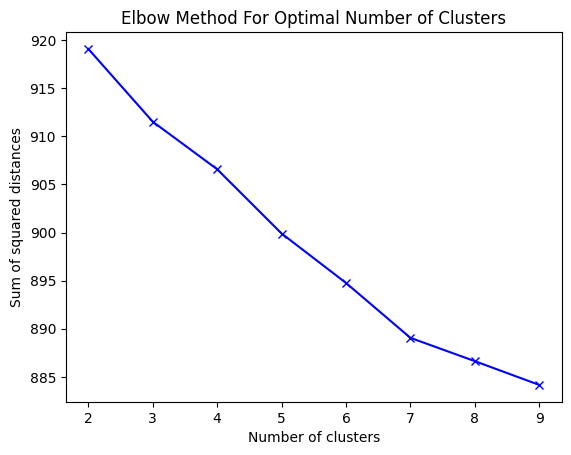

In [10]:
# Plotting for number of clusters

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [11]:
# Get clusters
true_k = 6
model = KMeans(n_clusters = true_k, max_iter = 600, n_init = 10, init = 'k-means++')
model.fit(X)

# Get prediction/labels
labels = model.labels_
book_c1 = pd.DataFrame(list(zip(df['title'],labels)), columns = ['title', 'cluster'])
print(book_c1.sort_values(by = ['cluster']))

                                                 title  cluster
592  Machine Learning revised and updated edition (...        0
216  Machine Learning for Time-Series with Python: ...        0
632            Bayesian Reasoning and Machine Learning        0
96   Machine Learning for Time Series Forecasting w...        0
631  The Machine Learning Workshop: Get ready to de...        0
..                                                 ...      ...
370  Hands-On Network Forensics: Investigate networ...        5
777  Interactive Data Visualization with Python: Pr...        5
778  PYTHON PROGRAMMING: 3 BOOKS IN 1: The Complete...        5
129  Mastering PostgreSQL 13: Build administer and ...        5
770  Artificial Intelligence in Finance: A Python-B...        5

[946 rows x 2 columns]


In [12]:
# Prediction on foreign data

test = vectorizer.transform(['machine learning'])
model.predict(test)[0]

0

##### Creating bubbles chart from matplotlib. Documentation:  https://matplotlib.org/3.5.0/gallery/misc/packed_bubbles.html

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


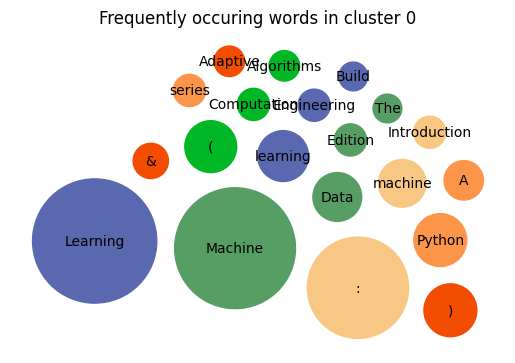

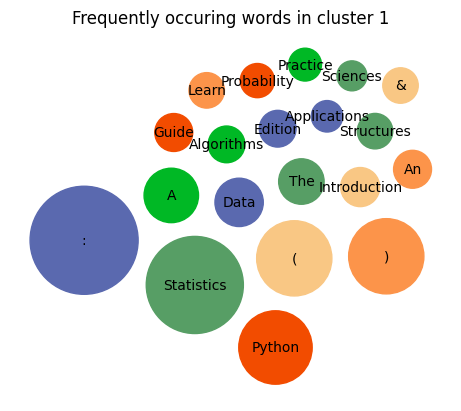

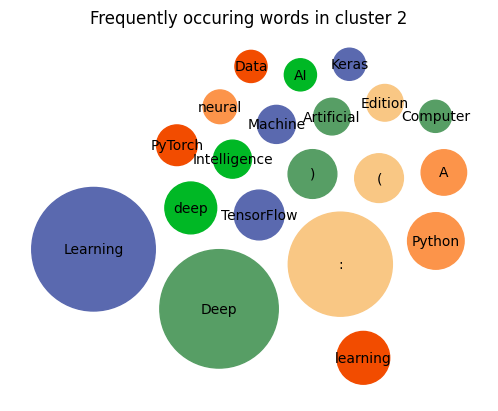

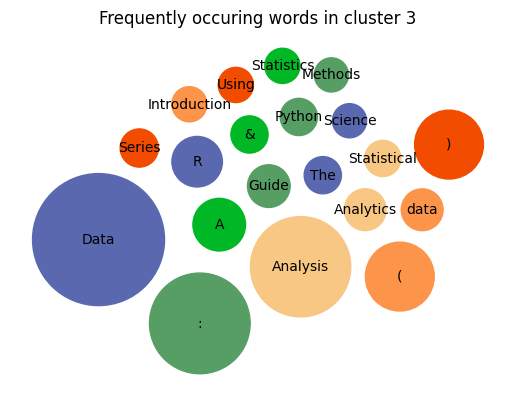

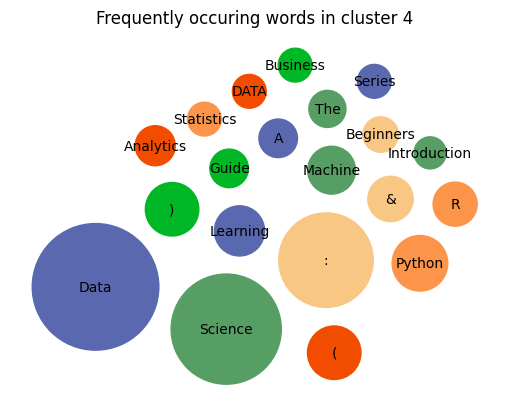

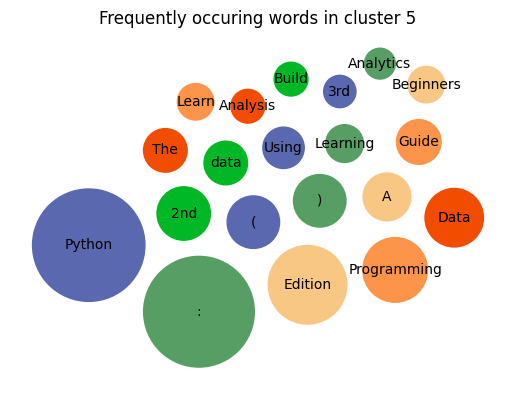

In [14]:
# Comments for main lines on the right ---->
nltk.download('punkt')
nltk.download('stopwords')

for k in range(true_k):
    text = book_c1[book_c1.cluster == k]['title'].str.cat(sep = ' ')                                                 # creates a string for all words in all the titles of clusters one by one
    text_tokens = word_tokenize(text)                                                                                # creates a list of all the words in 'text' 
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]                              # removes stopwords like 'am, he, was, here, how' etc.
    freq = Counter(tokens_without_sw)                                                                                # creates a dictionary of frequencies of all the words  
    area = pd.DataFrame.from_dict(freq, orient='index').reset_index()                                                # converts the dictionary to a dataframe
    area = area.rename(columns = {'index' : 'words', 0:'frequency'}).sort_values('frequency', ascending = False)     # rename columns and sort values by frequency (descending)
    area = area[0:20]                                                                                                # taking top 20 occuring words
    area['color'] = ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825','#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825','#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825','#5A69AF', '#579E65']   # have to specify colors for bubble chart
    area = area.reset_index(drop = True)                                                                             # reset index and drops the index column
                                                                                                                     # creating visualization for top words
    bubble_chart = BubbleChart(area=area['frequency'],bubble_spacing=2)                                              # specifying areas for bubbles
    bubble_chart.collapse()                           
    fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))                                                          # creating plot
    bubble_chart.plot(ax, area['words'], area['color'])                                                              # specifying colors and text to be shown in bubbles
    ax.axis("off")
    ax.relim()
    ax.autoscale_view()
    ax.set_title(f'Frequently occuring words in cluster {k}')
    plt.show()

# 🕸️ Scrape Amazon Book Reviews

In [15]:
# Using product urls available to get reviews page by formatting them
# Some urls have different structure. Ignoring them.

def get_review_url(product_url):
    try:
        split_url = product_url.split('/dp')
        review_url = split_url[0] + '/product-reviews/' + split_url[1].split('/')[1] + '/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
    except:
        review_url = None
    return review_url

df['review_urls'] = df['complete_link'].apply(lambda x : get_review_url(x))


# Dataframe with books with review urls
df_reviews = df.loc[~(df['review_urls'].isnull())].reset_index()
df_reviews

,index,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link,review_urls
0,0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...,https://www.amazon.com/Ace-Data-Science-Interv...
2,2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...,https://www.amazon.com/Fundamentals-Data-Engin...
3,3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...,https://www.amazon.com/Essential-Math-Data-Sci...
4,4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...,https://www.amazon.com/Data-Science-Business-D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,940,5 Steps to a 5: AP Statistics 2023 Elite Stude...,"[Jared Derksen,DeAnna Krause McDonald]",28.00,NaN,NaN,0,0.00,0.00,0.00,0.00,0.00,8.4 x 1.3 x 10.7 inches,2 pounds,English,McGraw Hill; 1st edition (August 23 2022),978-1264500338,/Steps-Statistics-2023-Elite-Student/dp/126450...,https://www.amazon.com/Steps-Statistics-2023-E...,https://www.amazon.com/Steps-Statistics-2023-E...
779,941,The Book of R: A First Course in Programming a...,[Tilman M. Davies],28.33,832.0,4.6,327,0.74,0.16,0.06,0.02,0.03,7 x 1.44 x 9.25 inches,2.95 pounds,English,No Starch Press; 1st edition (July 16 2016),978-1593276515,/Book-First-Course-Programming-Statistics/dp/1...,https://www.amazon.com/Book-First-Course-Progr...,https://www.amazon.com/Book-First-Course-Progr...
780,943,Elementary Statistics: Picturing the World,"[Ron Larson,Betsy Farber]",129.99,704.0,4.5,1025,0.72,0.14,0.07,0.01,0.05,8.5 x 1.1 x 11 inches,3.48 pounds,English,Pearson; 7th edition (January 3 2018),978-0134683416,/Elementary-Statistics-Picturing-World-7th/dp/...,https://www.amazon.com/Elementary-Statistics-P...,https://www.amazon.com/Elementary-Statistics-P...
781,944,Making Sense of Statistics: A Conceptual Overview,"[Fred Pyrczak,Deborah M. Oh]",47.76,252.0,4.6,145,0.78,0.13,0.04,0.02,0.04,8.5 x 0.57 x 11 inches,1.12 pounds,English,Routledge; 7th edition (June 18 2018),978-1138894761,/Making-Sense-Statistics-Fred-Pyrczak/dp/11388...,https://www.amazon.com/Making-Sense-Statistics...,https://www.amazon.com/Making-Sense-Statistics...


#### Scraping the reviews from amazon and putting them inside a pandas dataframe.

In [17]:
# A little help from github

headers = {
    "authority": "www.amazon.com",
    "pragma": "no-cache",
    "cache-control": "no-cache",
    "dnt": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "sec-fetch-site": "none",
    "sec-fetch-mode": "navigate",
    "sec-fetch-dest": "document",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
}

# Getting reviews for each book. Note: Could not scrape all links due to API unavailability.

book_reviews = pd.DataFrame()

for url in range(len(df_reviews)):
    html_text = requests.get(df_reviews['review_urls'][url], headers=headers).text
    soup = BeautifulSoup(html_text, 'lxml')
    reviews = soup.find_all("div", class_= "a-section celwidget")
    for index, value in enumerate(reviews):
        review_text = reviews[index].find("span", {"class": "a-size-base review-text review-text-content"}).get_text()
        review_stars = reviews[index].find("span", class_="a-icon-alt").get_text()
        book_reviews.loc[len(book_reviews),'review'] = review_text.strip()
        book_reviews.loc[len(book_reviews)-1, 'stars'] = review_stars
        book_reviews.loc[len(book_reviews)-1, 'title'] = df_reviews['title'][url]
    if (url + 1) % 50 == 0:
        print(f'{url + 1} done..')

50 done..
100 done..
150 done..
200 done..
250 done..
300 done..
350 done..
400 done..
450 done..
500 done..
550 done..
600 done..
650 done..
700 done..
750 done..


In [18]:
# Convert review column type to string to avoid any problems
book_reviews['review'] = book_reviews['review'].astype(str)

# Export reviews data to csv
book_reviews.to_csv('book_reviews.csv')

# Getting each book's reviews into a single string
book_reviews_agg = book_reviews.groupby('title', as_index = False).agg({'review': ' '.join})
book_reviews_agg

,title,review
0,5 Steps to a 5: AP Statistics 2022,Needed this for an AP exam and it got here qui...
1,97 Things About Ethics Everyone in Data Scienc...,This is an easy read and covers most ethical a...
2,A Common-Sense Guide to Data Structures and Al...,I was by no means “a beginner” when I picked u...
3,A First Course in Machine Learning (Chapman & ...,About as good a book you can learn from. This...
4,A Gentle Introduction to Stata,Very easy to read. Easy to follow. Covers what...
...,...,...
644,Using Python for Principles of Econometrics,This computing help guide replicates fully in ...
645,Using SPSS for Windows and Macintosh (7th Edit...,This book walks you through pretty well. The a...
646,Violent Python: A Cookbook for Hackers Forensi...,"My hosting provider, and my own servers, have ..."
647,Web Scraping with Python: Collecting More Data...,This book fit my situation well. I'm pretty co...


#### Two types of summarization of text:

1. Abstractive - Paraphrases the given text. Uses AI or machine learning.
2. Extractive - Takes out important sentences from paragraph as they are. Uses bert model. There may be other models available.

In [20]:
# can either do abstractive or extractive summarization
# For abstractive - use transformers (pytorch or tensorflow is required)
# For extractive - use bert-extractive-summarizer (pytorch or tensorflow required)

from summarizer import Summarizer

bert_model = Summarizer()

bert_summary = ''.join(bert_model(book_reviews_agg['review'][2], ratio = 0.2))

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


#### Summary of 10 reviews of a book concatenated

In [21]:
from IPython.display import display, Markdown
# A summary of all the reviews scraped for book with index 2
# Can compare this with original below.

display(Markdown(bert_summary))

I was by no means “a beginner” when I picked up this book. My complaint is against how the author chose to interject his explanation of the code. My feeling is that he’s taken away part of the book for those like me who don’t need (and can’t stand) highly-commented code. It just gave me a headache trying to parse code from comments. When it’s all “black and white,” it just blurs together. My feeling is that Ruby was the most represented of the three. All in all worth a read for the visualizations of the structures and algorithms. This book is the opposite, easy to read, by that I mean, concepts are explained in simple terms with walk through examples, along with visual examples, makes it easy to grasp, thus I now understand it, recursion now demystified, this book speaks my language,  highly recommend this book to anyone, whether you are starting out or looking for a primer. Even though most code is written in python, pearl, and JavaScript the code is readable to the point that you can comprehend the examples and can replicate them using your preferred programming language. By the way, I think step by step details were so good.

#### Original 10 Reviews concatenated

In [22]:
display(Markdown(book_reviews_agg['review'][2]))

I was by no means “a beginner” when I picked up this book. But it’s also been 20 years since I learned anything DS&A. I picked this book over others mostly on a whim, but being geared towards beginners, I was at least assured that the subject material would fly over my head.So don’t get me wrong, this is a fantastic, educational book. My complaint is against how the author chose to interject his explanation of the code. My feeling is that he’s taken away part of the book for those like me who don’t need (and can’t stand) highly-commented code. Heck, I’m okay if there were just a few, well-worded, well-placed comments that gave reasons for unclear aspects of the code. But at about a quarter through, I stopped trying to read too much of the code. It just gave me a headache trying to parse code from comments. When it’s all “black and white,” it just blurs together.Then, once you’re done trying to find the code amongst the comments, realize it’s maybe 6 lines of code, he says, “This code is not trivial, so let’s break it down.” Dude. You already did that. In the middle of the code. Using comments. And also. My man. Six lines is very nearly the _exact_ meaning of trivial. Non-trivial is when you need to create classes and use _actual_ programming techniques of architecture and design. Not writing 6 lines of code that you didn’t even write tests for because you’re not the first person to write it that way, in that language.So if you can get past the frustration involved with that aspect, the actual DS&A part is amazingly good and easy to understand. I’ve recommended the book on more than one occasion; I only mention the code comments when I think it’ll benefit the person to whom I’m recommending the book.I would certainly enjoy a second, less beginner-focused version that maybe expands on the concepts, or even repeats some with more succinct code/comments. As far as introducing the data structures this book takes a great visual approach. Algorithms are often easiest to understand in animated form but the step by step of this book is quite strong.The major weakness is by jumping between JS, Python, and Ruby you never fully develop any of them. Although the programmatic style is mostly translatable between these three languages it’s still typically better to do one thing fully rather than a few things partially. My feeling is that Ruby was the most represented of the three.All in all worth a read for the visualizations of the structures and algorithms. Got this book on a recommendation to help with the class that I’ve been struggling in have not finished it yet, but so far it’s helping me understand data structures much better I have read 7-9 books on this subject, majority are difficult to understand thus hard for the concepts to stick inside my brain.This book is the opposite, easy to read, by that I mean, concepts are explained in simple terms with walk through examples, along with visual examples, makes it easy to grasp, thus I now understand it, recursion now demystified, this book speaks my language,  highly recommend this book to anyone, whether you are starting out or looking for a primer. I can't say enough good things about this book. The author writes in everyday language so these concepts are so much more easily understood than any other resources I've found. This book is perfect for someone like me who does not have a strong mathematics or computer science background. I started a job as a dev and am going back to learn some CS fundamentals, and this is absolutely the best place you can start. If you're looking for a DSA book that is easy to understand and worth your time, THIS IS IT! If you're coming from a non-CS background, this is the book you want. I rarely think a book deserves 5 stars, but the author did an amazing job.In my journey to becoming a self taught software engineer, I found this book only after 3 years of working professionally, and I STILL gained a alot if value out of it, namely filling some gaps that may have still been present in my makeshift education.That's said, even if you are brand new, this is still the book you want, and I wish I found it years ago! I only got this book because others suggested it. Even though most code is written in python, pearl, and JavaScript the code is readable to the point that you can comprehend the examples and can replicate them using your preferred programming language. For example, I use mostly Kotlin and Java and as long as you understand basic programming syntax, then it’s straightforward.Honestly this book made me not afraid of data structures. I used to avoid studying them, but now I feel like I was worried more because of “big words” instead of the data structures.Thanks for writing this book! It gave me confidence to learn deeper topics. By the way, I think step by step details were so good. Most books force you to assume steps from beginning to end, but you actually show each step. Even though it cost a lot of ink to print each step haha, it is so worth it in terms of visualizing a complex/new concept. The book has a good logical flow.  It presents a lot of great concepts in a fairly easy to digest way.My bone to pick is the fact that most of the examples are given in Ruby.  I personally don’t use Ruby, and the syntax is so different compared to any of the more popular languages (Java, C, C++ even Python) that it can be hard at times to decipher what the code is doing and than subsequently translate that to the language of your choosing.  Some examples are given in Python which is sensible, and if the whole book used Python I’d have no issues translating the exercises to a new language.This honestly might just be a shortcoming on my part but I wouldn’t recommend this book if you don’t regularly use Ruby or don’t already understand the concepts being taught and how to implement them. I don’t have a very intensive training for DSA but this book gives a very detailed explanation of concepts that is easily digestible to the brain. Book is good introduction to algorithms but I find it a bit too simple for myself.  Also didn't like the mix use of programming languages in the samples.

Source of Dataset: https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books